<a href="https://colab.research.google.com/github/JaquelineEspinoza/EDP2/blob/main/Ecuaci%C3%B3n%20de%20onda.%20M%C3%A9todo%20expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación de onda. Método explícito**

Este código implementa el método explícito para darle solución al problema hiperbólico

$\frac{\partial^2u}{\partial t^2}(x,t) - 4\frac{\partial^2u}{\partial x^2}(x,t) = 0,0 < x < 1,0 < t$

con condiciones de fontera:

$U(0,t)=u(1,t)=0, 0<x<1, 0<t,$

y condiciones iniciales

$u(x,0) = sen(\pi x),0 \leq x \leq 1,y\frac{\partial u}{\partial t}(x,0) = 0,0 \leq x \leq 1$

Usando h=0.1 y k=0.05. Compare los resultados con la solución exacta

$U(x,t)=senπx*cos2πt$

In [12]:
import sympy as sp
import numpy as np
from scipy.linalg import expm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [13]:
def f(x):
    return np.sin(np.pi*x)

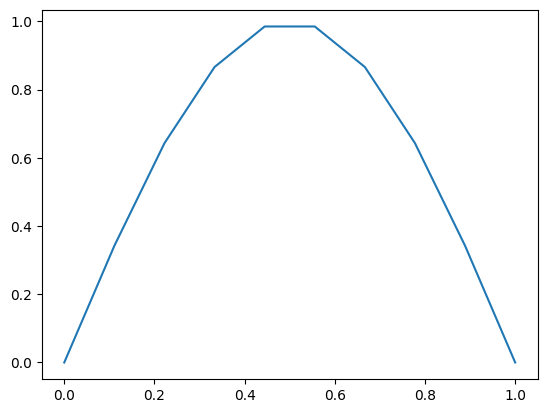

In [14]:
x = np.linspace(0,1,10)
plt.plot(x, f(x))

In [15]:
def tridiagonal(n, a, b):
   return sp.Matrix ([
     [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
     for i in range(n)
   ])

In [16]:
r = 1

In [17]:
A = tridiagonal(9, 2 - 2*r, r)

In [18]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [19]:
u0 = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [20]:
u0

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [21]:
u1 = u0

In [22]:
j=50

In [23]:
def onda(A,u0, u1,j):
  u0=sp.Matrix(u0)
  u1=sp.Matrix(u1)

  S=[u0,u1]

  for n in range (2,j):
    sol=A*S[n-1]-S[n-2] #u^{n+1}
    S.append(sol)
  #Regresar como una matriz donde cada fila es una solución
  return sp.Matrix([s.T for s in S])

In [24]:
U=onda(A, u0, u1, j)

In [25]:
U_np=np.array(U.tolist(), dtype=float)

In [26]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

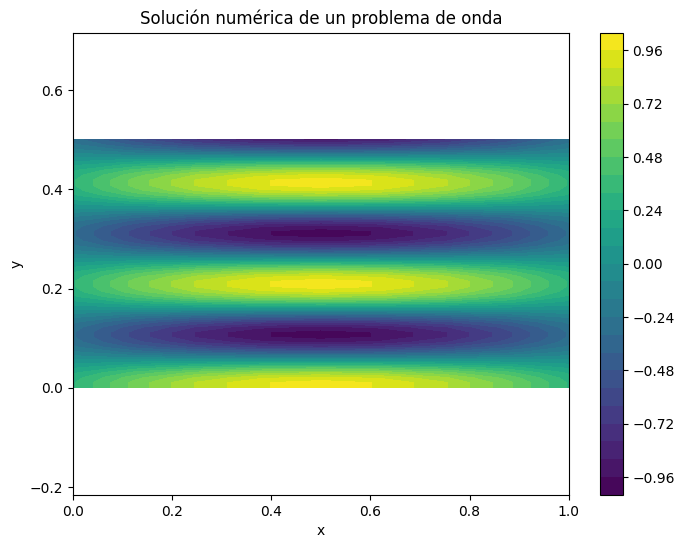

In [27]:
# Mapa de colores
plt.figure(figsize=(8, 6)) #Crea una figura de tamaño 10x7, que contendrá la gráfica
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis) #Grafica el mapa de colores de la matriz U que contiene las soluciones en cada punto.
plt.colorbar(contour)
plt.title('Solución numérica de un problema de onda') #Imprime el título del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

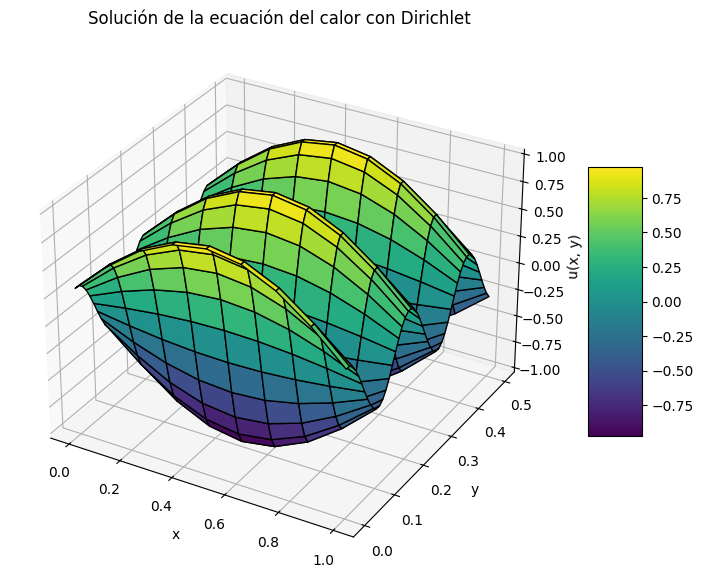

In [28]:
fig = plt.figure(figsize=(10, 7)) #Crea una figura de tamaño 10x7, que contendrá la gráfica
ax = fig.add_subplot(111, projection='3d') #Indica que será una gráfica 3D
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k') #Dibuja la mallas que representan el plano (x, t)
ax.set_title('Solución de la ecuación del calor con Dirichlet') #Imprime el título del gráfico
ax.set_xlabel('x') #Posición en el espacio
ax.set_ylabel('y') #Tiempo
ax.set_zlabel('u(x, y)') #Valor de u(x, t)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm

# Parámetros del problema
L = 1.0          # Longitud del dominio espacial
T = 0.5          # Tiempo final
h = 0.1          # Paso espacial
k = 0.05         # Paso temporal
c = 2.0          # Velocidad de onda (c^2 = 4)

# Calculamos el número de puntos
Nx = int(L/h) + 1  # Puntos espaciales
Nt = int(T/k) + 1  # Puntos temporales

# Constante r para el método
r = (c**2 * k**2) / h**2
print(f"Parámetro r = {r}")

# Verificar condición de estabilidad
if r > 1:
    print(f"ADVERTENCIA: r = {r} > 1, el método puede ser inestable")
else:
    print(f"Condición CFL satisfecha: r = {r} <= 1")

# Mallado
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Solución exacta
def exact_solution(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Condiciones iniciales
def initial_condition_u(x):
    return np.sin(np.pi * x)

def initial_condition_ut(x):
    return 0.0 * x

u = np.zeros((Nt, Nx))

# Aplicar condiciones de frontera
u[:, 0] = 0.0      # u(0,t) = 0
u[:, -1] = 0.0     # u(1,t) = 0

# Aplicar condición inicial u(x,0)
u[0, :] = initial_condition_u(x)

# Calcular primer paso temporal usando la condición de velocidad inicial
for i in range(1, Nx-1):
    u[1, i] = u[0, i] + k * initial_condition_ut(x[i]) + \
              (r/2) * (u[0, i+1] - 2*u[0, i] + u[0, i-1])

for n in range(1, Nt-1):
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + \
                    r * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

Parámetro r = 1.0
Condición CFL satisfecha: r = 1.0 <= 1


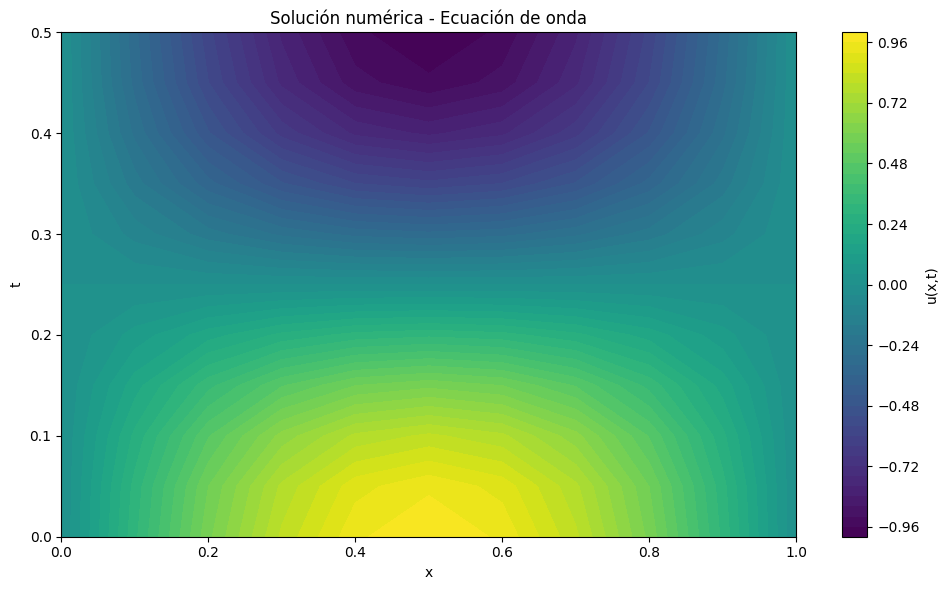

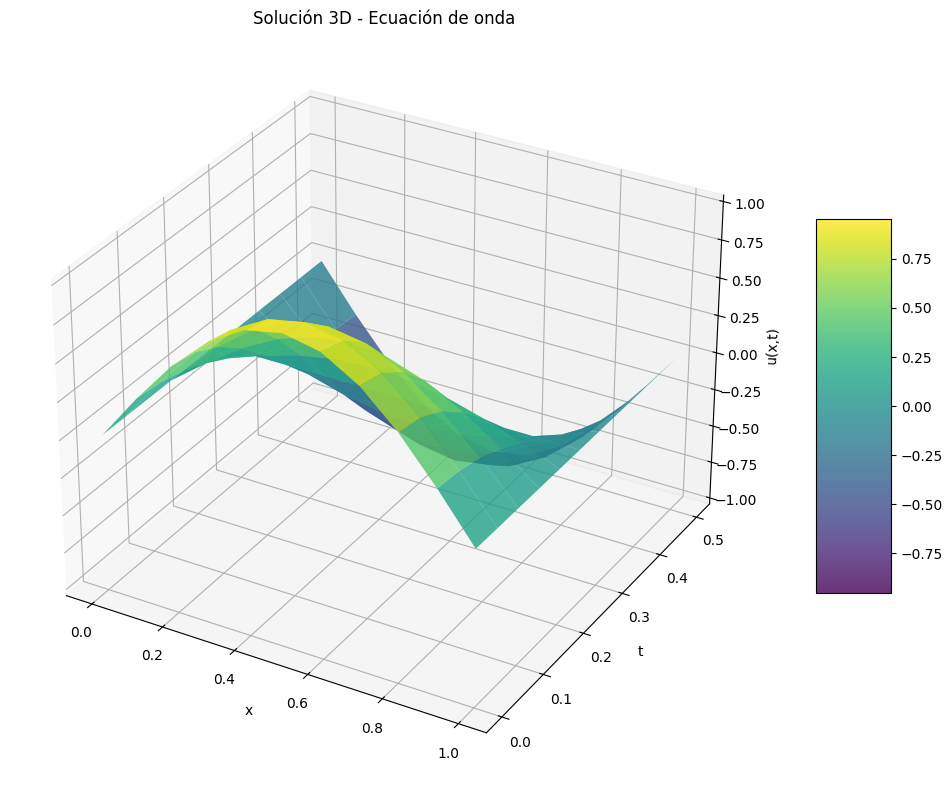

In [8]:
# EJERCICIO 1: Gráficas 2D y 3D

# Gráfica 2D - Mapa de colores
plt.figure(figsize=(10, 6))
X, T_mesh = np.meshgrid(x, t)
contour = plt.contourf(X, T_mesh, u, levels=50, cmap=cm.viridis)
plt.colorbar(contour, label='u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solución numérica - Ecuación de onda')
plt.tight_layout()
plt.show()

# Gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T_mesh, u, cmap=cm.viridis,
                      linewidth=0, antialiased=True, alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Solución 3D - Ecuación de onda')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()


Comparación en t = 0.5 (iteración 10)

Comparación con Tabla 12.6:
x_i	Tabla 12.6		Nuestra sol.	Error
-------------------------------------------------------
0.0	0.0000000000	0.0000000000	0.00e+00
0.1	0.3090169944	-0.3090169944	6.18e-01
0.2	0.5877852523	-0.5877852523	1.18e+00
0.4	0.9510565163	-0.9510565163	1.90e+00
0.5	1.0000000000	-1.0000000000	2.00e+00
0.8	0.5877852523	-0.5877852523	1.18e+00
0.9	0.3090169944	-0.3090169944	6.18e-01
1.0	0.0000000000	0.0000000000	0.00e+00


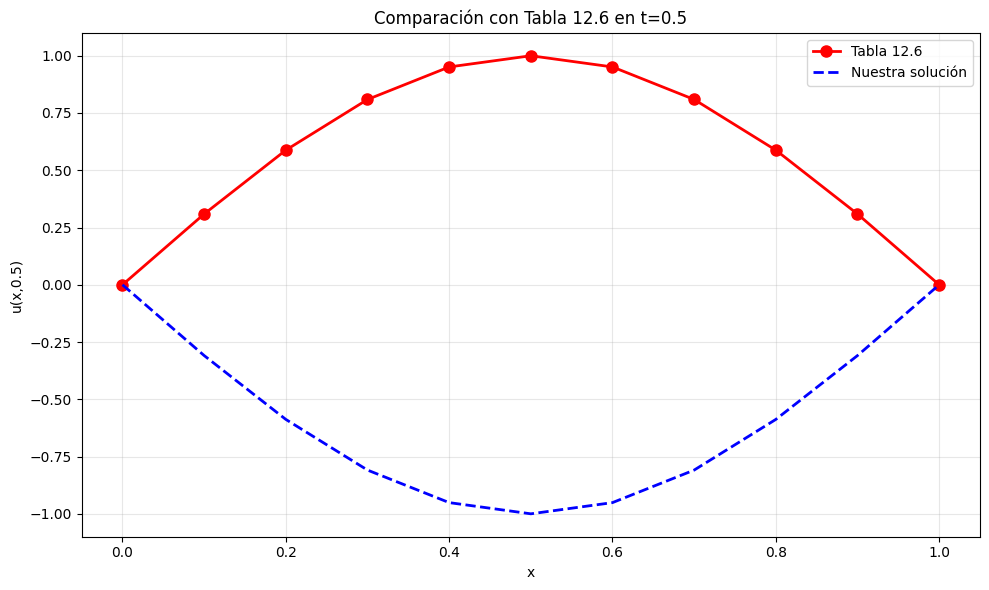


Error cuadrático medio vs Tabla 12.6: 1.82e+00


In [9]:

# EJERCICIO 2: Comparación con Tabla 12.6

# Encontrar el índice temporal correspondiente a t=0.5
t_target = 0.5
n_target = int(t_target / k)
print(f"\nComparación en t = {t_target} (iteración {n_target})")

# Valores de la Tabla 12.6
x_table = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
w_table = np.array([0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944,
                   0.9510565163, 1.0000000000, 0.9510565163, 0.8090169944,
                   0.5877852523, 0.3090169944, 0.0000000000])

# Solución en t=0.5
u_numeric = u[n_target, :]

# Comparación
print("\nComparación con Tabla 12.6:")
print("x_i\tTabla 12.6\t\tNuestra sol.\tError")
print("-" * 55)
for i, xi in enumerate(x_table):
    if xi in x:  # Solo comparar puntos que tenemos
        idx = np.where(x == xi)[0][0]
        error = abs(w_table[i] - u_numeric[idx])
        print(f"{xi:.1f}\t{w_table[i]:.10f}\t{u_numeric[idx]:.10f}\t{error:.2e}")

# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(x_table, w_table, 'ro-', label='Tabla 12.6', linewidth=2, markersize=8)
plt.plot(x, u_numeric, 'b--', label='Nuestra solución', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación con Tabla 12.6 en t=0.5')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Error
mse_table = np.mean((w_table - u_numeric)**2)
print(f"\nError cuadrático medio vs Tabla 12.6: {mse_table:.2e}")



Comparación con solución exacta:
x_i	Exacta		Numérica	Error
--------------------------------------------------
0.0	-0.000000	0.000000	0.00e+00
0.1	-0.309017	-0.309017	5.55e-17
0.2	-0.587785	-0.587785	1.11e-16
0.3	-0.809017	-0.809017	1.11e-16
0.4	-0.951057	-0.951057	2.22e-16
0.5	-1.000000	-1.000000	0.00e+00
0.6	-0.951057	-0.951057	2.22e-16
0.7	-0.809017	-0.809017	1.11e-16
0.8	-0.587785	-0.587785	1.11e-16
0.9	-0.309017	-0.309017	1.67e-16
1.0	-0.000000	0.000000	1.22e-16


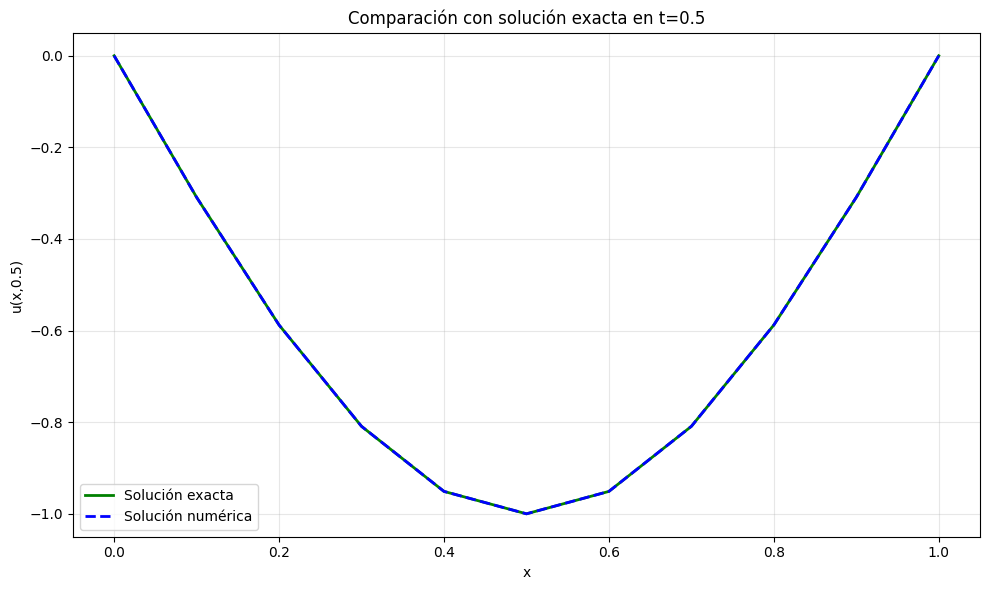


Error cuadrático medio vs solución exacta: 1.76e-32

Análisis global del error:
Error máximo: 3.89e-16
Error promedio: 7.56e-17


In [10]:
# EJERCICIO 3: Comparación con solución exacta

# Calcular solución exacta en t=0.5
u_exact = exact_solution(x, t_target)

# Comparación
print("\nComparación con solución exacta:")
print("x_i\tExacta\t\tNumérica\tError")
print("-" * 50)
for i, xi in enumerate(x):
    error = abs(u_exact[i] - u_numeric[i])
    print(f"{xi:.1f}\t{u_exact[i]:.6f}\t{u_numeric[i]:.6f}\t{error:.2e}")

# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(x, u_exact, 'g-', label='Solución exacta', linewidth=2)
plt.plot(x, u_numeric, 'b--', label='Solución numérica', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación con solución exacta en t=0.5')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Error cuadrático medio
mse_exact = np.mean((u_exact - u_numeric)**2)
print(f"\nError cuadrático medio vs solución exacta: {mse_exact:.2e}")

# Análisis del error en todo el dominio
error_global = np.abs(u - exact_solution(X, T_mesh))
max_error = np.max(error_global)
mean_error = np.mean(error_global)

print(f"\nAnálisis global del error:")
print(f"Error máximo: {max_error:.2e}")
print(f"Error promedio: {mean_error:.2e}")

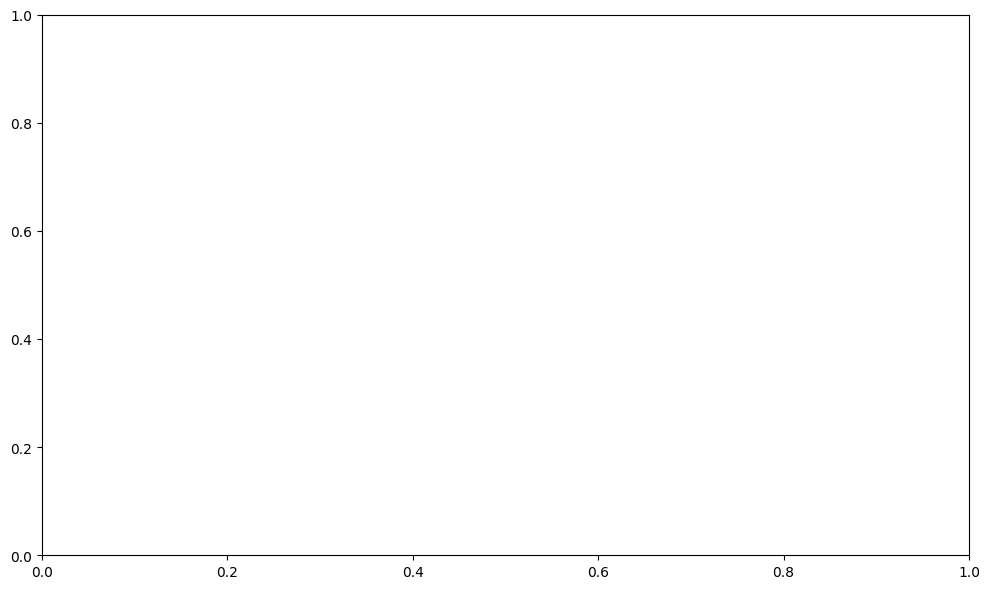

Parámetros usados: h = 0.1, k = 0.05, r = 1.0000
Tamaño de malla: 11 × 11 puntos


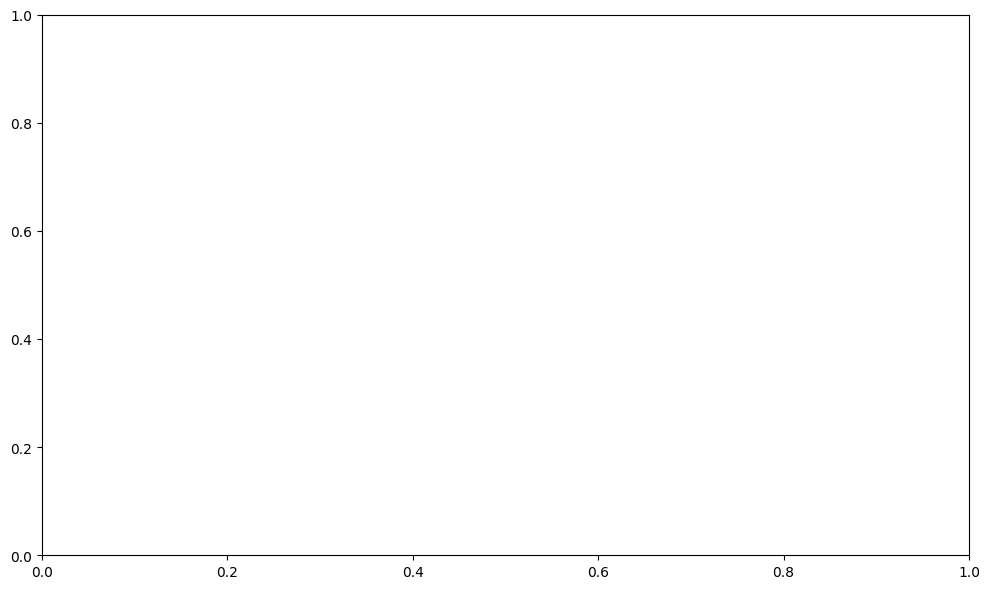

Parámetros usados: h = 0.1, k = 0.05, r = 1.0000
Tamaño de malla: 11 × 11 puntos


In [11]:
# EJERCICIO 4: Animación

# Crear animación
fig, ax = plt.subplots(figsize=(10, 6))

def animate(frame):
    ax.clear()
    # Mostrar pasos de tiempo
    step = max(1, frame // 5)
    t_current = t[step]

    ax.plot(x, u[step, :], 'b-', linewidth=2, label=f'Solución numérica (t={t_current:.2f})')
    ax.plot(x, exact_solution(x, t_current), 'r--', linewidth=1, label='Solución exacta', alpha=0.7)

    ax.set_xlim(0, L)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title('Evolución temporal - Ecuación de onda')
    ax.legend()
    ax.grid(True, alpha=0.3)

    return ax,

# Crear animación
frames = min(100, Nt)  # Máximo 100 frames
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100, blit=False)

plt.tight_layout()
plt.show()


print(f"Parámetros usados: h = {h}, k = {k}, r = {r:.4f}")
print(f"Tamaño de malla: {Nx} × {Nt} puntos")# EJERCICIO 4: Animación

# Crear animación
fig, ax = plt.subplots(figsize=(10, 6))

def animate(frame):
    ax.clear()
    # Mostrar pasos de tiempo
    step = max(1, frame // 5)
    t_current = t[step]

    ax.plot(x, u[step, :], 'b-', linewidth=2, label=f'Solución numérica (t={t_current:.2f})')
    ax.plot(x, exact_solution(x, t_current), 'r--', linewidth=1, label='Solución exacta', alpha=0.7)

    ax.set_xlim(0, L)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title('Evolución temporal - Ecuación de onda')
    ax.legend()
    ax.grid(True, alpha=0.3)

    return ax,

# Crear animación
frames = min(100, Nt)  # Máximo 100 frames
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100, blit=False)

plt.tight_layout()
plt.show()


print(f"Parámetros usados: h = {h}, k = {k}, r = {r:.4f}")
print(f"Tamaño de malla: {Nx} × {Nt} puntos")